Importing Relevant Libraries

In [1]:
import tensorflow
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/jax/_src/cloud_tpu_init.py:86: UserWarning: Transparent hugepages are not enabled. TPU runtime startup and shutdown time should be significantly improved on TPU v5e and newer. If not already set, you may need to enable transparent hugepages in your VM image (sudo sh -c "echo always > /sys/kernel/mm/transparent_hugepage/enabled")
  warnings.warn(


Loading Dataset

In [2]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

Visualizing the Images

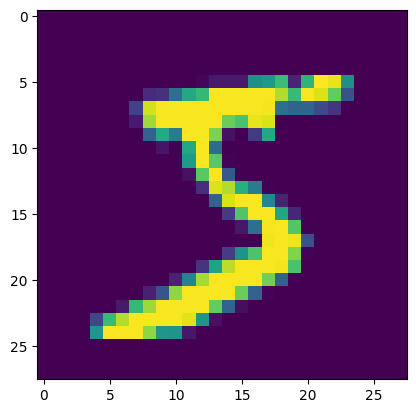

In [4]:
plt.imshow(X_train[0])

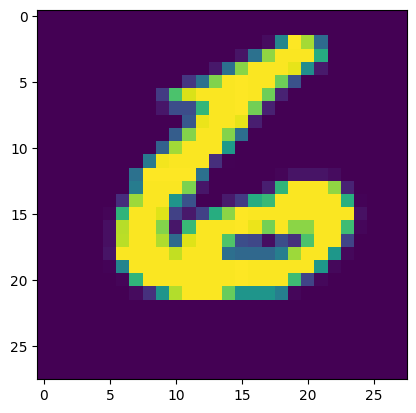

In [5]:
plt.imshow(X_test[-1])

Normalizing the Training data for better model training

In [6]:
X_train = X_train / 255
X_test = X_test / 255

Creating Model

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['acc'])

In [10]:
history = model.fit(X_train, y_train, epochs = 20, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.8565 - loss: 0.5014 - val_acc: 0.9583 - val_loss: 0.1376
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9630 - loss: 0.1238 - val_acc: 0.9681 - val_loss: 0.1095
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9755 - loss: 0.0813 - val_acc: 0.9674 - val_loss: 0.1100
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9821 - loss: 0.0615 - val_acc: 0.9726 - val_loss: 0.0943
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9861 - loss: 0.0448 - val_acc: 0.9724 - val_loss: 0.0898
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9888 - loss: 0.0355 - val_acc: 0.9758 - val_loss: 0.0878
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9903 - loss: 0.0313 - val_acc: 0.9716 - val_loss: 0.1040
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.9917 - loss: 0.0240 - val_acc: 0.9723 - val_loss: 0.1121
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━

In [11]:
Y_pred_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step


In [12]:
Y_pred = Y_pred_prob.argmax(axis=1)

In [13]:
accuracy_score(Y_pred, y_test)

0.9763

Visualizing the model accuracy history using Matplotlib

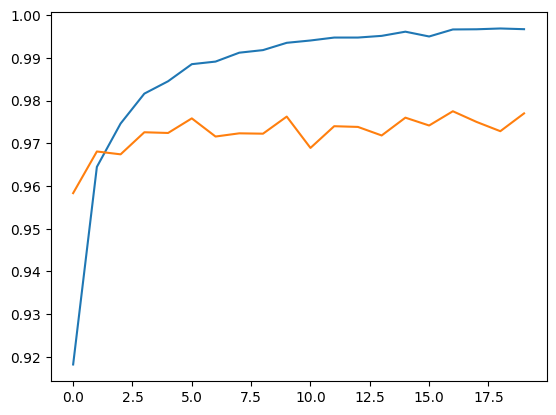

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

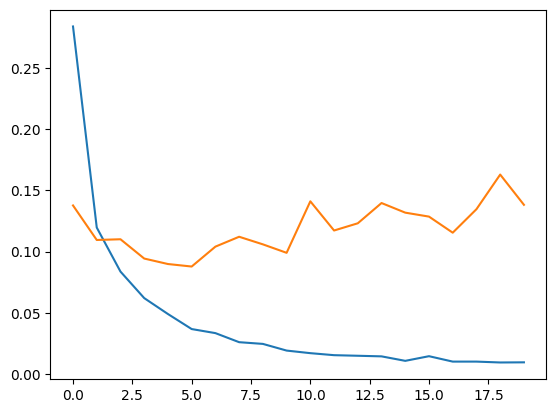

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])